# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import tweepy
import json
import timeit
from credentials import *

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_file = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [15]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
open("tweet_images.csv", "wb").write(r.content)

335079

In [3]:
tweets = pd.read_csv("tweet_images.csv", sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
tweet_id = twitter_file.tweet_id.values
len(tweet_id)

2356

In [ ]:
count = 0
fails_dict = {}
start = timeit.timeit()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for ids in tweet_id:
        count += 1
        print(str(count) + ": " + str(ids))
        try:
            tweet = api.get_status(ids, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[ids] = e
            pass
end = timeit.timeit()
print(end - start)
print(fails_dict)

In [74]:
len(fails_dict)

29

In [41]:
# this is for saving to _json, so not needed.
#input_data = []
#with open('tweet_json.txt', 'r') as file:
#    for line in file.readlines():
#        input_data.append(line.strip())

In [56]:
scraped_tweets = []
for line in open('tweet_json.txt', 'r'):
    scraped_tweets.append(json.loads(line))

In [69]:
df = pd.json_normalize(scraped_tweets) 

In [86]:
df.to_csv("scraped_tweets.csv", index=False)

In [6]:
load_scraped = pd.read_csv("scraped_tweets.csv")

<ipython-input-6-0fb51519be83>:1: DtypeWarning: Columns (91,96,98,99,126,143,144,145,146,149,150,151,152,153,154,155,156,157,158,166,167,168,169,170,171,172,173,177,181,182,185,186,187,189,190,191,192,193,194,195,199,200,201,202,203,204,205,206,207,212,215,216,217,218,219,227,228,229,232,235,236,237,238,239,240,241,242,243,244,252,253,254,255,256,257,258,259,263,267,268,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,298,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325) have mixed types. Specify dtype option on import or set low_memory=False.
  load_scraped = pd.read_csv("scraped_tweets.csv")


In [8]:
new_tweet = load_scraped[["id", "retweet_count", "favorite_count"]]

In [9]:
new_tweet

,id,retweet_count,favorite_count
0,892420643555336193,7009,33802
1,892177421306343426,5301,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7763,35275
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [16]:
tweets.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
# files to work with are:
# twitter_file : The original download with 2356 rows.
# tweets : which contains the image prediction files
# new_tweet : The df culled from twitter today to augment twitter_file

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_file.shape

(2356, 17)

In [78]:
sum(twitter_file.duplicated())

0

In [79]:
twitter_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [83]:
twitter_file.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [84]:
twitter_file.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [87]:
new_tweet.shape

(2327, 3)

### Quality issues
1. Majority of the columns that refer to retweets are blank 

2. There are missing values in the expanded url column

3. Some duplicate rows appear unique but whereas one is the original post, the other a retweet

4. Some dog names and type are in the tweet text but not added in the name column

5. There are dog names missing from the entire data. Replaced with **None**

6. Missing dog names filled with wrong values like **not**, **a**, **this** instead of **None**

7. Timestamp is string not datetime

8. Some ratings are incorrect values. Example is for dog named Sam without rating but was given 24/7 which refers to all day and night. Also, dog name Bluebert which is 11/10 but recorded as 50/50.

9. Ratings denominator violates the WeRateDogs mantra of over 10. Some are 0, 7, 50, 150 and one went as high as 170.

10. The scrapped tweets has 29 rows less due to missing, or private tweets encountered.

### Tidiness issues
1. The dog stages columns can be collapsed into one column

2. The expanded urls have duplicated entries which in some instance are external urls other than tweets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
main_df = twitter_file.copy()
augument_df = new_tweet.copy()

In [48]:
pred_df = tweets.copy()

### Issue #1: Merge the main and augmented dataframe

### Define

Merge both data frames on the augumented data so we can remove tweets with invalid, private or missing ids. Then perform another merge with the image dataset to remove tweets without predictions.

### Code

In [50]:
# merge the main and augumented datasets
main_df = pd.merge(main_df, augument_df, how="right", left_on="tweet_id", right_on="id")

In [51]:
# merge the main and augumented datasets
main_df = pd.merge(main_df, pred_df, how="right", on="tweet_id")

### Test

In [52]:
main_df.shape

(2075, 31)

In [53]:
main_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'id', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #1: Remove retweets and replies tweets

#### Define

Drop all in_reply_to_status_id that is not null. Also drop all tweets with retweeted_status_id that is not null.

#### Code

In [54]:
retweet_replies = main_df[(main_df["retweeted_status_id"].notnull()) | (main_df["in_reply_to_status_id"].notnull())]

In [55]:
retweet_replies.tweet_id.value_counts

<bound method IndexOpsMixin.value_counts of 94      667550882905632768
95      667550904950915073
183     669353438988365824
314     671729906628341761
453     674754018082705410
               ...        
1940    860924035999428608
1950    863079547188785154
1964    867072653475098625
2006    877611172832227328
2041    885311592912609280
Name: tweet_id, Length: 94, dtype: int64>

In [58]:
main_df.drop(retweet_replies.index, inplace=True)

#### Test

In [67]:
main_df.shape

(1981, 31)

In [65]:
main_df[main_df["retweeted_status_id"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [66]:
main_df[main_df["in_reply_to_status_id"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #2: Drop columns that are redundant

#### Define

Some columns (like expanded_url) have either not needed for further analysis, or (like retweeted_status) have outlived their importance. So we have to drop them before continuing further.

#### Code

In [70]:
main_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [80]:
iphone = main_df[main_df['source'].str.contains('iphone', regex=False, na=False)]
len(iphone)

1925

In [79]:
tweet_deck = main_df[main_df['source'].str.contains('tweetdeck', regex=False, na=False)]
len(tweet_deck)

10

In [81]:
web = main_df[main_df['source'].str.contains('Web Client', regex=False, na=False)]
len(web)

28

In [94]:
sources = pd.DataFrame({"iphone": 1925, "tweet_deck": 10, "web": 28}, index=[0])

In [95]:
sources

,iphone,tweet_deck,web
0,1925,10,28


<AxesSubplot:>

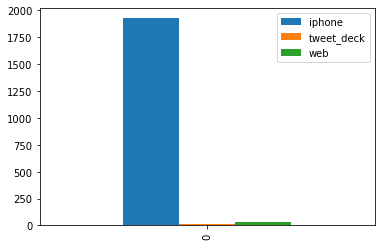

In [99]:
sources.plot(kind="bar")

In [68]:
main_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'id', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [108]:
to_drop = ["in_reply_to_status_id", "in_reply_to_user_id", "source", 
            "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp",
           "expanded_urls", "id"]

In [110]:
main_df.drop(columns = to_drop, inplace=True)

#### Test

In [111]:
main_df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #3: Inspect for denominators 

### Define

There are few rows with denominators that are 0, 7 or values greater than 10. To reduce inconsistencies and living by the over 10 code, let's check to see how many of them ar present. If the values are small, we drop them all. If quite large, then we fill them in manually by visiting each tweet to confirm.

### Code

In [129]:
denom_issues = main_df[main_df["rating_denominator"] != 10]
len(denom_issues)

35

In [ ]:
main_df.loc[1349:1352]

In [ ]:
main_df[main_df["name"].isnull()]

Ok. Something is wrong here. visual examination of the original data shows 23 but here we have 35. Inspecting the data shows that merging by the prediction file introduced NaN values to our data. Now, we have to drop them all since we won't need predictions without other details.

In [133]:
main_df.drop(denom_issues.index, axis=0, inplace=True)

### Test

In [134]:
main_df[main_df["rating_denominator"] != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.

2.

3.

### Visualization